<a href="https://colab.research.google.com/github/binmalik018/Spoon-Knife/blob/main/Expt3-Document_classification_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.datasets import fetch_20newsgroups

In [ ]:
ds = fetch_20newsgroups()
ds.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
cat = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
train = fetch_20newsgroups(subset= 'train', categories = cat )
test =  fetch_20newsgroups(subset= 'test', categories = cat )

In [ ]:
print(len(test.data))

7532


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn import metrics

In [ ]:
model = make_pipeline(TfidfVectorizer(),MultinomialNB())

In [ ]:
model.fit(train.data, train.target)
labels = model.predict(test.data)
print("Precision = ", metrics.precision_score(test.target, labels, average='weighted'))
print("Accuracy = ", metrics.accuracy_score(test.target, labels))
print("Accuracy =", metrics.accuracy_score(test.target,labels))
print("F1-score =", metrics.f1_score(test.target,labels, average='weighted'))

Precision =  0.8218781741893993
Accuracy =  0.7738980350504514
Accuracy = 0.7738980350504514
F1-score = 0.7684457156894653


<Axes: >

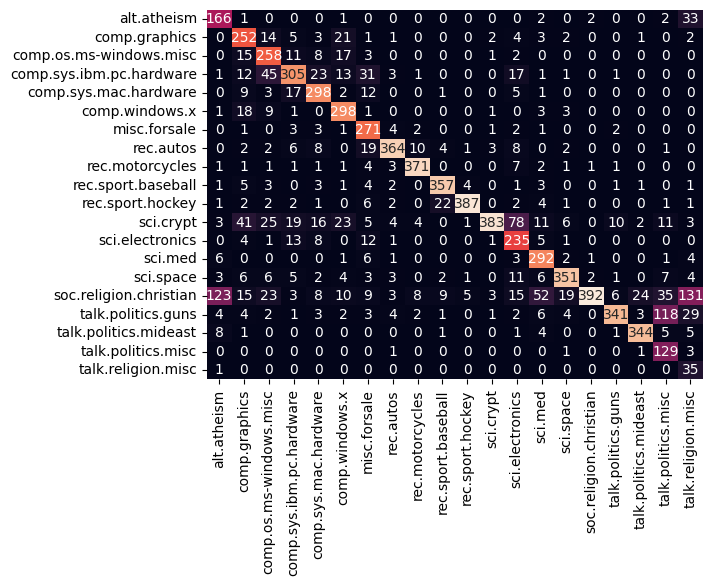

In [ ]:
mat = metrics.confusion_matrix(test.target, labels)
sns.heatmap(mat.T, fmt='d', cbar=False, annot= True, xticklabels= train.target_names, yticklabels= train.target_names, )